In [13]:
import geopandas as gpd
import rioxarray as rio
from geocube.api.core import make_geocube
import numpy as np

# Compare preliminary NVE runoff normal to final published version

During autumn 2022, NVE provided a pre-release version of their 1991-2020 runoff normal. The final version has now been published, so this notebook checks to see if there are any significant changes compared to the pre-release dataset.

In [2]:
prelim_path = r"/home/jovyan/shared/teotil3/nve_hbv_data/runoff_1991-2020_mm_year.tif"
final_path = r"/home/jovyan/shared/teotil3/nve_hbv_data/Hydrologi_AarsavrenningQNormal9120Pkt.geojson"

In [7]:
# Read the preliminary version
prelim_ds = rio.open_rasterio(prelim_path).sel(band=1)
prelim_ds

<xarray.DataArray (y: 1550, x: 1195)>
[1852250 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -7.45e+04 -7.35e+04 ... 1.118e+06 1.12e+06
  * y            (y) float64 8e+06 7.998e+06 7.998e+06 ... 6.452e+06 6.45e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -9999.0
    scale_factor:   1.0
    add_offset:     0.0

In [3]:
# Read the official, published version
gdf = gpd.read_file(final_path)
gdf.head()

,objektType,QNormal9120_mm,dataUttaksdato,eksportType,geometry
0,Avrenning,850,20230608,NVEs nedlastningsløsning,POINT (953500.000 7939500.000)
1,Avrenning,753,20230608,NVEs nedlastningsløsning,POINT (973500.000 7939500.000)
2,Avrenning,828,20230608,NVEs nedlastningsløsning,POINT (974500.000 7939500.000)
3,Avrenning,840,20230608,NVEs nedlastningsløsning,POINT (953500.000 7938500.000)
4,Avrenning,590,20230608,NVEs nedlastningsløsning,POINT (954500.000 7938500.000)


In [8]:
# Convert to raster
final_ds = make_geocube(
    vector_data=gdf, measurements=["QNormal9120_mm"], like=prelim_ds,
)
final_ds

<xarray.Dataset>
Dimensions:         (y: 1550, x: 1195)
Coordinates:
  * y               (y) float64 8e+06 7.998e+06 7.998e+06 ... 6.452e+06 6.45e+06
  * x               (x) float64 -7.45e+04 -7.35e+04 ... 1.118e+06 1.12e+06
    spatial_ref     int64 0
Data variables:
    QNormal9120_mm  (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan

0.0 1.0


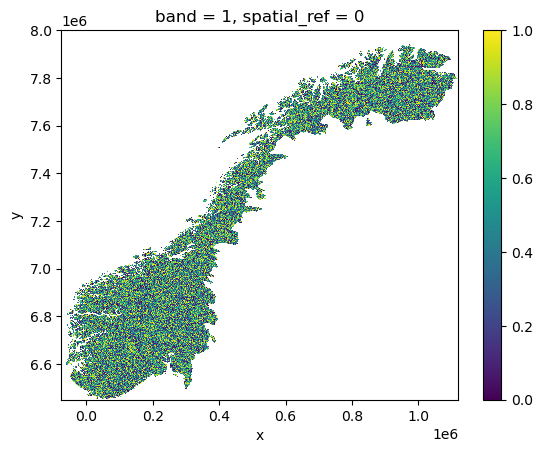

In [20]:
# Compute differences
diffs = prelim_ds - final_ds['QNormal9120_mm']
print(np.nanmin(diffs), np.nanmax(diffs))
diffs.plot()

The result above shows that the differences between the pre-release and published versions are never more than 1 mm (because one dataset is rounded down to integer values while the other is not).